In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import resample

In [2]:
users_df = pd.read_parquet('data/credit_card_users_de.parquet')
users_df

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [3]:
cards_df = pd.read_parquet('data/sd254_cards_de.parquet')
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [4]:
transactions_df = pd.read_parquet('data/credit_card_transaction_data_de.parquet')
transactions_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,$66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No
4137,0,0,2016,1,4,06:43,$40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No
4138,0,0,2016,1,7,09:30,$54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No
4139,0,0,2016,1,7,16:03,$89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4140,0,0,2016,1,10,06:38,$29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No


##### Explore the data

In [5]:
users_df.describe()

,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Person                       2000 non-null   object 
 1   Current Age                  2000 non-null   int64  
 2   Retirement Age               2000 non-null   int64  
 3   Birth Year                   2000 non-null   int64  
 4   Birth Month                  2000 non-null   int64  
 5   Gender                       2000 non-null   object 
 6   Address                      2000 non-null   object 
 7   Apartment                    528 non-null    float64
 8   City                         2000 non-null   object 
 9   State                        2000 non-null   object 
 10  Zipcode                      2000 non-null   int64  
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income 

In [7]:
users_df = users_df.drop('Apartment', axis=1)

In [8]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   6146 non-null   int64 
 1   CARD INDEX             6146 non-null   int64 
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64 
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64 
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64 
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64 
 12  Card on Dark Web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [9]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6877837 entries, 4136 to 24386731
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 839.6+ MB


<Axes: xlabel='Longitude', ylabel='Latitude'>

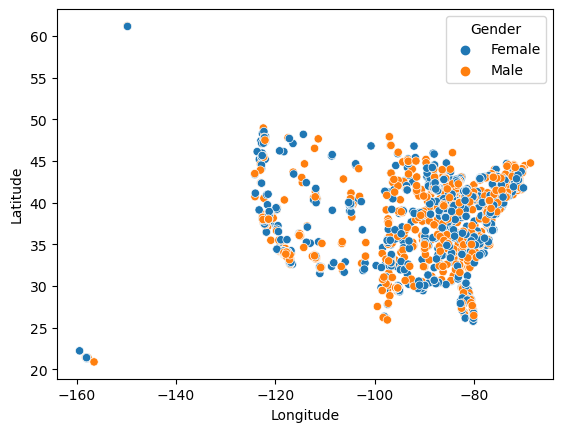

In [10]:
# see users data locations
sns.scatterplot(data=users_df, x='Longitude', y='Latitude', hue='Gender')

<Axes: xlabel='Longitude', ylabel='Latitude'>

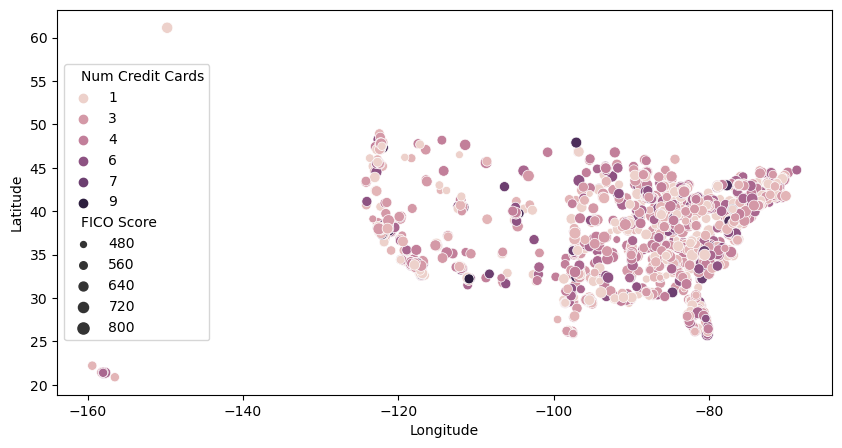

In [11]:
# Visualize the records based on their location on the map and the number of credict cards they have. The size of each marker is the users FICO score.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=users_df, x='Longitude', y='Latitude', hue='Num Credit Cards', size='FICO Score')

<Axes: xlabel='Gender', ylabel='count'>

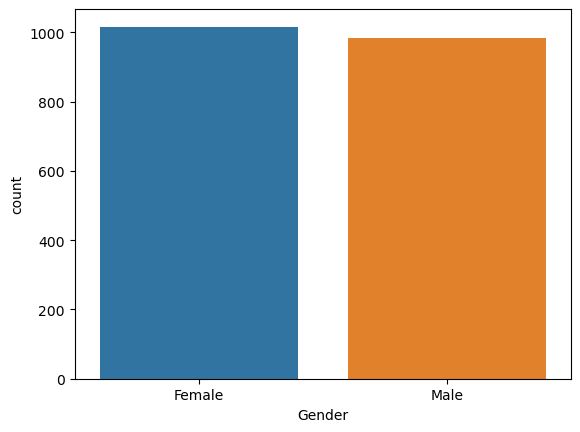

In [12]:
# Check what is the ratio of the  male and female in the dataset
sns.countplot(data=users_df, x='Gender')

<Axes: xlabel='Card Brand', ylabel='count'>

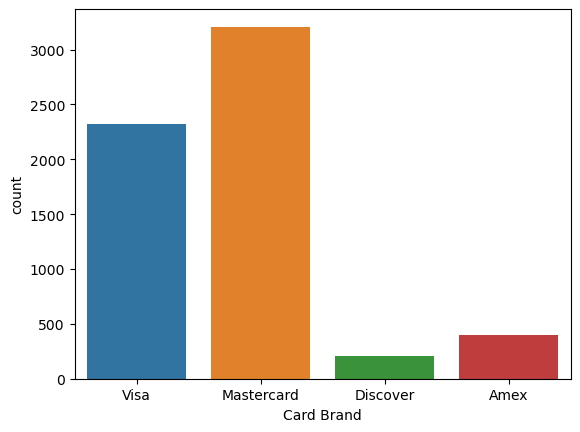

In [13]:
# Check how many cards we have for each brand
sns.countplot(data=cards_df, x='Card Brand')

It is important to know how many brands do we have in the data to be able to find which card has more potential for fraud.

In [14]:
cards_df.columns

Index(['User', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Credit Limit',
       'Acct Open Date', 'Year PIN last Changed', 'Card on Dark Web'],
      dtype='object')

<Axes: xlabel='Card Brand', ylabel='count'>

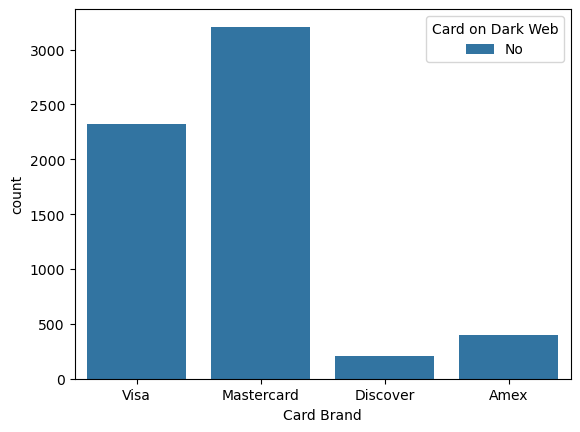

In [15]:
sns.countplot(data=cards_df, x='Card Brand', hue='Card on Dark Web')

It appears all the crads information we have are not on dard web. Therefore, it is safe to drop that column.

In [16]:
cards_df = cards_df.drop('Card on Dark Web', axis=1)
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009


In [17]:
users_df.columns

Index(['Person', 'Current Age', 'Retirement Age', 'Birth Year', 'Birth Month',
       'Gender', 'Address', 'City', 'State', 'Zipcode', 'Latitude',
       'Longitude', 'Per Capita Income - Zipcode', 'Yearly Income - Person',
       'Total Debt', 'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [18]:
cards_df.columns

Index(['User', 'CARD INDEX', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'CVV', 'Has Chip', 'Cards Issued', 'Credit Limit',
       'Acct Open Date', 'Year PIN last Changed'],
      dtype='object')

In [19]:
transactions_df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')

<Axes: xlabel='Is Fraud?', ylabel='count'>

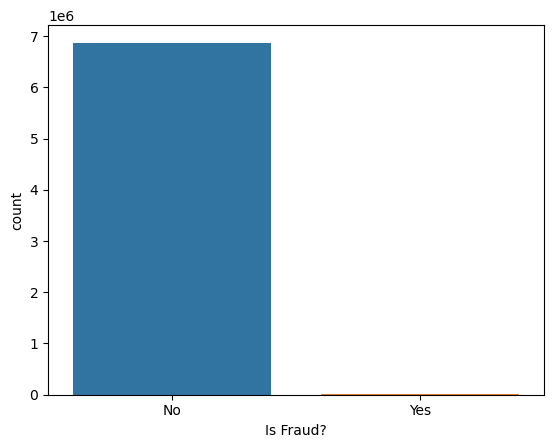

In [20]:
sns.countplot(data=transactions_df, x='Is Fraud?')

In [21]:
transactions_df['Is Fraud?'].value_counts()

No     6869425
Yes       8412
Name: Is Fraud?, dtype: int64

We are facing an imbalanced data since there are more than 800 times "No" labels in the dataset comparing to "Yes"

Where the frauds happened? To do so first we take out all the user IDs who were victim of the fraud then we get their lat/long information and plot them on map.

In [22]:
vicitm_ids = transactions_df[transactions_df['Is Fraud?'] == "Yes"]['User'].unique()
print(vicitm_ids)
print(len(vicitm_ids))

[   0    1    2    3    4    5    6    8   13   15   17   22   23   29
   31   36   37   40   41   42   44   47   48   49   50   52   53   55
   59   61   62   64   65   67   68   71   73   74   75   77   81   83
   86   89   91   92   94   96   98  100  102  103  106  107  109  111
  112  114  116  118  124  126  128  129  134  135  137  138  142  143
  149  151  156  159  161  162  165  167  170  171  176  178  179  180
  182  184  185  186  187  190  192  193  195  197  201  202  204  205
  207  209  210  212  214  215  219  220  222  225  226  228  229  230
  239  240  241  242  243  254  256  257  259  261  262  266  268  269
  271  275  278  281  283  285  286  288  289  291  292  294  297  298
  299  300  301  302  304  307  311  313  317  318  319  320  322  325
  327  331  332  333  338  341  348  349  350  354  360  362  365  367
  370  371  376  377  381  390  392  393  395  396  406  408  410  411
  413  414  416  417  420  423  424  425  427  430  432  433  440  441
  443 

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_1192\2869246013.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(transactions_df.corr(), annot=True)


<Axes: >

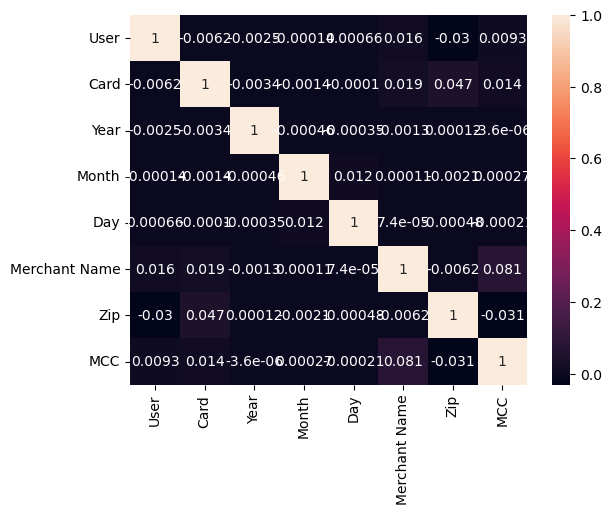

In [23]:
sns.heatmap(transactions_df.corr(), annot=True)

#### Fit Logistic Regression model (our baseline)

In [24]:
user_trans_df = pd.merge(left=transactions_df, right=users_df, left_on='User', right_index=True, how='left')
user_trans_df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
4136,0,0,2016,1,3,10:48,$66.48,Chip Transaction,-3345936507911876459,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4137,0,0,2016,1,4,06:43,$40.02,Chip Transaction,-34551508091458520,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4138,0,0,2016,1,7,09:30,$54.11,Chip Transaction,4055257078481058705,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4139,0,0,2016,1,7,16:03,$89.48,Chip Transaction,3414527459579106770,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4140,0,0,2016,1,10,06:38,$29.15,Chip Transaction,-5475680618560174533,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386727,1999,1,2019,12,30,11:38,$66.53,Chip Transaction,2910328604019547969,Milford,...,Merrimack,NH,3054,42.86,-71.48,$32325,$65909,$181261,673,2
24386728,1999,1,2019,12,30,12:03,$99.67,Chip Transaction,1641456720718814353,Merrimack,...,Merrimack,NH,3054,42.86,-71.48,$32325,$65909,$181261,673,2
24386729,1999,1,2019,12,30,18:44,$93.63,Chip Transaction,-5501892381419303127,Merrimack,...,Merrimack,NH,3054,42.86,-71.48,$32325,$65909,$181261,673,2
24386730,1999,1,2019,12,30,20:09,$67.60,Online Transaction,-6160036380778658394,ONLINE,...,Merrimack,NH,3054,42.86,-71.48,$32325,$65909,$181261,673,2


In [25]:
# not all the information required. try to remove the info not necessary. We may need to come back and use them later. But for now to reduce the dimensionality of the base model, let's remove some.
user_trans_df = user_trans_df[['User', 'Amount', 'Use Chip', 'Is Fraud?', 'Current Age', 'Gender', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']]
user_trans_df.shape

(6877837, 10)

In [26]:
# Lets add some card information to the dataset as well. It is good to know which brand of card is used.
user_trans_card_df = pd.merge(left=user_trans_df, right=cards_df, on='User', how='left')
user_trans_card_df

,User,Amount,Use Chip,Is Fraud?,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,...,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed
0,0,$66.48,Chip Transaction,No,53,Female,$59696,$127613,787,5,...,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008
1,0,$66.48,Chip Transaction,No,53,Female,$59696,$127613,787,5,...,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014
2,0,$66.48,Chip Transaction,No,53,Female,$59696,$127613,787,5,...,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004
3,0,$66.48,Chip Transaction,No,53,Female,$59696,$127613,787,5,...,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012
4,0,$66.48,Chip Transaction,No,53,Female,$59696,$127613,787,5,...,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24551457,1999,$93.63,Chip Transaction,No,21,Female,$65909,$181261,673,2,...,Visa,Credit,4994011318343994,12/2020,120,YES,1,$14400,05/2017,2017
24551458,1999,$67.60,Online Transaction,No,21,Female,$65909,$181261,673,2,...,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020
24551459,1999,$67.60,Online Transaction,No,21,Female,$65909,$181261,673,2,...,Visa,Credit,4994011318343994,12/2020,120,YES,1,$14400,05/2017,2017
24551460,1999,$51.71,Chip Transaction,No,21,Female,$65909,$181261,673,2,...,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020


In [27]:
user_trans_card_df = user_trans_card_df.drop(columns=['User', 'CARD INDEX', 'Card Number', 'Expires', 'CVV', 'Cards Issued', 'Acct Open Date'])

In [28]:
user_trans_card_df.shape

(24551462, 14)

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_1192\2242549063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = user_trans_card_df.corr()


<Axes: >

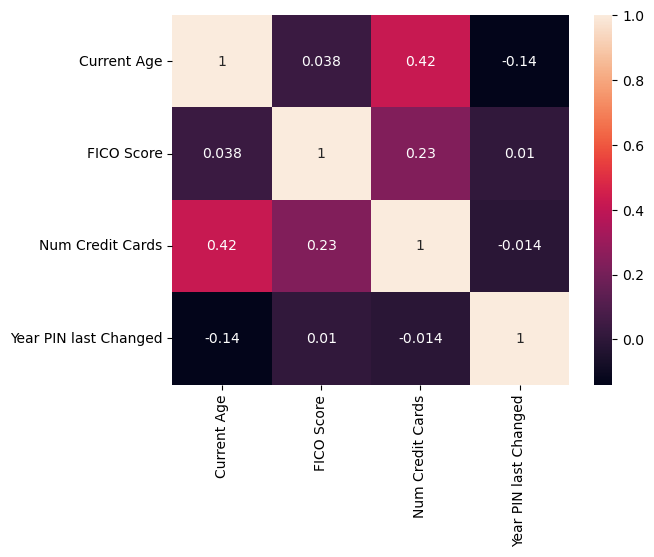

In [29]:
corr_matrix = user_trans_card_df.corr()
sns.heatmap(corr_matrix, annot=True)

In [30]:
# First oversample the 'Yes' category
# not_fraud_df = user_trans_card_df[user_trans_card_df['Is Fraud?'] == 'Yes']
# fraud_df = user_trans_card_df[user_trans_card_df['Is Fraud?'] == "No"]
# not_fraud_oversampled = resample(not_fraud_df, replace=True, n_samples=len(fraud_df), random_state=42)

# user_trans_card_upsampled_df = pd.concat([not_fraud_oversampled, fraud_df])
# user_trans_card_upsampled_df.head()

In [31]:
# Undersampling
not_fraud_df = user_trans_card_df[user_trans_card_df['Is Fraud?'] == 'No']
fraud_df = user_trans_card_df[user_trans_card_df['Is Fraud?'] == "Yes"]
not_fraud_undersampled = resample(not_fraud_df, replace=True, n_samples=len(fraud_df), random_state=42)

user_trans_card_downsampled_df = pd.concat([not_fraud_undersampled, fraud_df])
user_trans_card_downsampled_df

,Amount,Use Chip,Is Fraud?,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Card Brand,Card Type,Has Chip,Credit Limit,Year PIN last Changed
23233433,$48.99,Chip Transaction,No,53,Male,$70634,$155651,682,4,Mastercard,Debit,YES,$21280,2018
16116785,$16.45,Online Transaction,No,43,Female,$45360,$14587,704,3,Visa,Debit,YES,$18105,2012
23360764,$-82.00,Chip Transaction,No,83,Female,$33811,$2206,682,7,Mastercard,Debit,YES,$16908,2013
21111918,$1.80,Chip Transaction,No,86,Female,$9678,$812,688,6,Amex,Credit,YES,$6500,2020
13333110,$10.25,Chip Transaction,No,43,Female,$24917,$36101,693,2,Mastercard,Credit,YES,$6300,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24537565,$351.51,Online Transaction,Yes,47,Female,$30942,$71066,779,3,Amex,Credit,YES,$6900,2013
24537566,$351.51,Online Transaction,Yes,47,Female,$30942,$71066,779,3,Visa,Credit,YES,$5700,2012
24537567,$188.26,Online Transaction,Yes,47,Female,$30942,$71066,779,3,Mastercard,Debit,YES,$16415,2016
24537568,$188.26,Online Transaction,Yes,47,Female,$30942,$71066,779,3,Amex,Credit,YES,$6900,2013


In [32]:
user_trans_card_downsampled_df['Amount'] = user_trans_card_downsampled_df['Amount'].str[1:].astype(float)
user_trans_card_downsampled_df['Yearly Income - Person'] = user_trans_card_downsampled_df['Yearly Income - Person'].str[1:].astype(float)
user_trans_card_downsampled_df['Total Debt'] = user_trans_card_downsampled_df['Total Debt'].str[1:].astype(float)
user_trans_card_downsampled_df['Credit Limit'] = user_trans_card_downsampled_df['Credit Limit'].str[1:].astype(float)

In [33]:
# now split the data to train and test dataset to be able to measure the performance of the model
from sklearn.model_selection import train_test_split

X = user_trans_card_downsampled_df.drop('Is Fraud?', axis=1)
X = pd.get_dummies(X)
y = user_trans_card_downsampled_df['Is Fraud?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\hoo11155\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
accuracy_train = lr.score(X_train, y_train)
print(f"Train accuracy of the Logistic Regression model: % {(accuracy_train * 100):.2f}")

Train accuracy of the Logistic Regression model: % 59.89


In [41]:
accuracy_test = lr.score(X_test, y_test)
print(f"Test accuracy of the Logistic Regression model: %{accuracy_test * 100 : .2f}")

Test accuracy of the Logistic Regression model: % 60.54


#### Random Forest Analysis

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rf_acc_train = random_forest.score(X_train, y_train)
print(f"Train accuracy of the Random Forest model: % {rf_acc_train * 100 :.2f}")

Train accuracy of the Random Forest model: % 99.99


In [46]:
rf_ac_test = random_forest.score(X_test, y_test)
print(f"Test accuracy of the Random Forest model: % {rf_ac_test * 100 :.2f}")

Test accuracy of the Random Forest model: % 81.50


#### Multi-layer Perceptron (MLP)

In [47]:
from sklearn.neural_network import MLPClassifier

In [49]:
clf = MLPClassifier()
clf.fit(X_train, y_train)

MLPClassifier()

In [50]:
nn_acc_train = clf.score(X_train, y_train)
print(f"Train accuracy of the MLP model: % {nn_acc_train * 100 :.2f}")

Test accuracy of the MLP model: % 50.55


In [51]:
nn_acc_test = clf.score(X_test, y_test)
print(f"Test accuracy of the MLP model: % {nn_acc_test * 100 :.2f}")

Test accuracy of the MLP model: % 50.27


The accuracy of the MLP with just one hidden layer did not perform well. Now let's try with different artictures and improve the performance of the model.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [56]:
clf_std = MLPClassifier()
clf_std.fit(X_train_std, y_train)

C:\Users\hoo11155\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [58]:
nn_acc_train_std = clf_std.score(X_train, y_train)
print(f"Train accuracy of the MLP model: % {nn_acc_train_std * 100 :.2f}")

Train accuracy of the MLP model: % 50.08


C:\Users\hoo11155\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [59]:
nn_acc_test_std = clf_std.score(scaler.transform(X_test), y_test)
print(f"Test accuracy of the MLP model: % {nn_acc_test_std * 100 :.2f}")

Test accuracy of the MLP model: % 72.54


### Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [69]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(model.predict(X_test), y_test)
    ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=lr.classes_).plot()

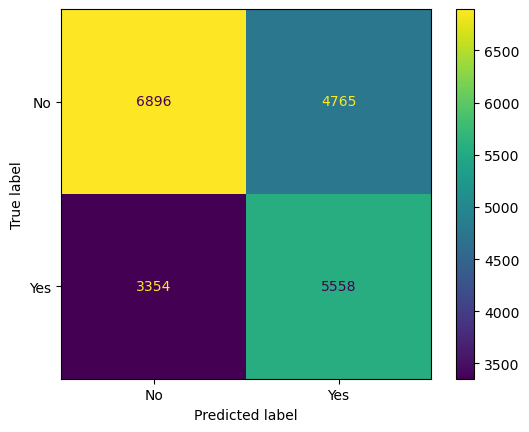

In [70]:
plot_confusion_matrix(lr)

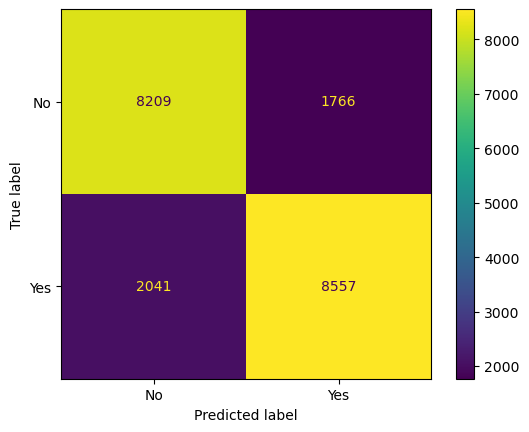

In [71]:
plot_confusion_matrix(random_forest)

C:\Users\hoo11155\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


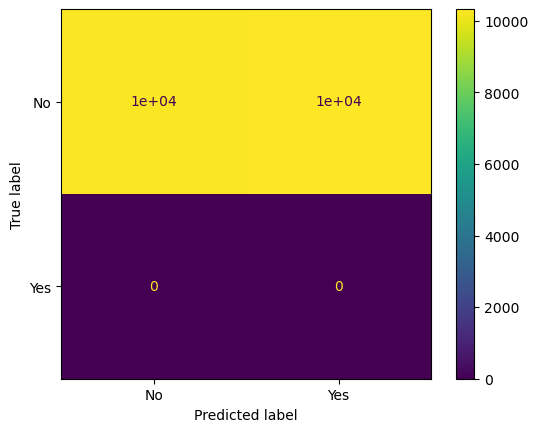

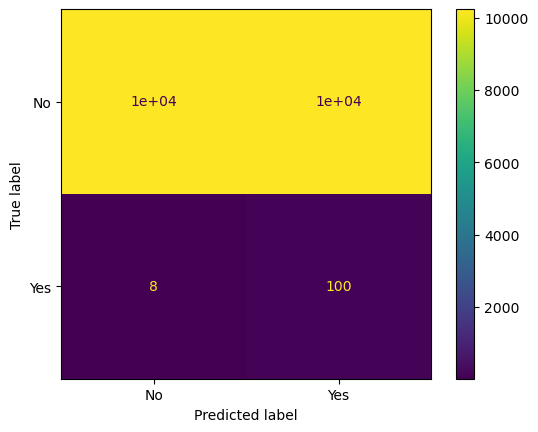

In [74]:
cm = confusion_matrix(clf.predict(X_test), y_test)
ConfusionMatrixDisplay(confusion_matrix=cm,
                    display_labels=lr.classes_).plot()

In [81]:
y_test.value_counts()

Yes    10323
No     10250
Name: Is Fraud?, dtype: int64